In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv('../../data/important data/train_together_new.csv')
X = data.drop(columns='price')
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Feature importance based on permutation:
Feature 0: Mean = 0.0006, Std = 0.0012
Feature 1: Mean = 0.0045, Std = 0.0035
Feature 2: Mean = 0.0068, Std = 0.0026
Feature 3: Mean = 0.0061, Std = 0.0018
Feature 4: Mean = 0.0117, Std = 0.0031
Feature 5: Mean = 0.0014, Std = 0.0022
Feature 6: Mean = 0.0034, Std = 0.0015
Feature 7: Mean = 0.0145, Std = 0.0026
Feature 8: Mean = 0.0089, Std = 0.0014
Feature 9: Mean = 0.0136, Std = 0.0018
Feature 10: Mean = 0.0085, Std = 0.0019
Feature 11: Mean = 0.0067, Std = 0.0017
Feature 12: Mean = 0.0093, Std = 0.0023
Feature 13: Mean = 0.0089, Std = 0.0025
Feature 14: Mean = 0.0052, Std = 0.0018
Feature 15: Mean = 0.0209, Std = 0.0029
Feature 16: Mean = 0.0026, Std = 0.0013
Feature 17: Mean = -0.0003, Std = 0.0017
Feature 18: Mean = 0.0058, Std = 0.0014
Feature 19: Mean = 0.0013, Std = 0.0009
Feature 20: Mean = 0.0025, Std = 0.0018
Feature 21: Mean = 0.0016, Std = 0.0016
Feature 22: Mean = 0.0025, Std = 0.0019
Feature 23: Mean = 0.0008, Std = 0.0019
Feature 

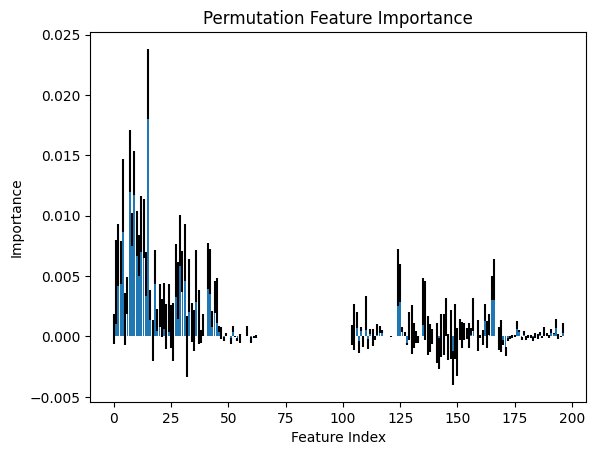

In [7]:
# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Permutation Importance on the test set
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')

# Display feature importance
print("Feature importance based on permutation:")
for i in range(len(result.importances_mean)):
    print(f"Feature {i}: Mean = {result.importances_mean[i]:.4f}, Std = {result.importances_std[i]:.4f}")

# Optionally, plot the results
import matplotlib.pyplot as plt

features = np.arange(X.shape[1])
plt.bar(features, result.importances_mean, yerr=result.importances_std)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Permutation Feature Importance')
plt.show()


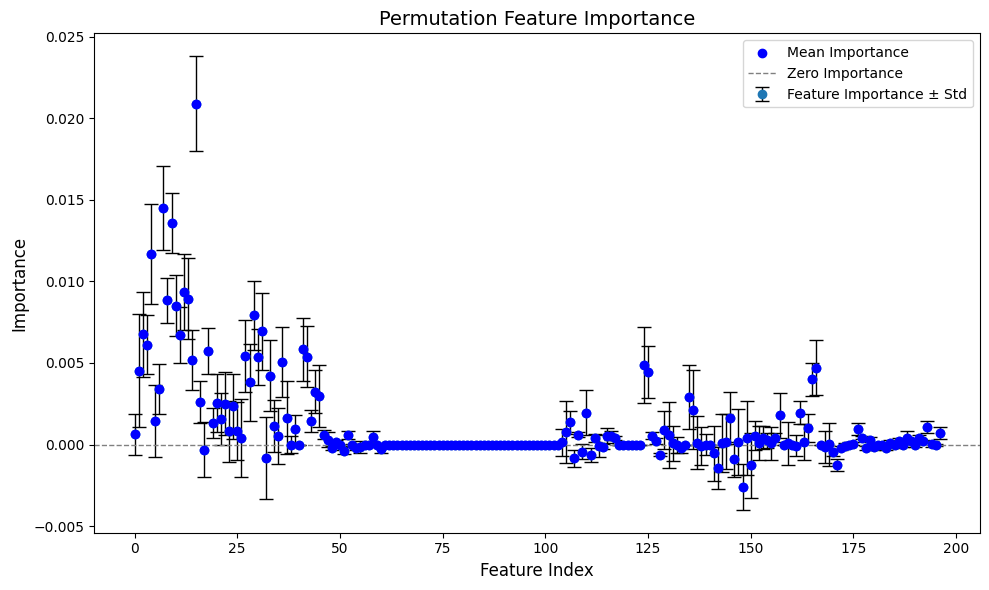

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 获取数据
features = np.arange(len(result.importances_mean))
mean_importance = result.importances_mean
std_importance = result.importances_std

# 创建图形
plt.figure(figsize=(10, 6))
plt.errorbar(
    features, mean_importance, yerr=std_importance, fmt='o', ecolor='black',
    capsize=5, elinewidth=1, capthick=1, label='Feature Importance ± Std'
)

# 美化图形
plt.scatter(features, mean_importance, color='blue', label='Mean Importance', zorder=5)
plt.axhline(0, color='gray', linestyle='--', linewidth=1, label='Zero Importance')
plt.title("Permutation Feature Importance", fontsize=14)
plt.xlabel("Feature Index", fontsize=12)
plt.ylabel("Importance", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.tight_layout()

# 展示图形
plt.show()
